# Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Loading the Dataset

In [38]:
df = pd.read_csv('./data/emails.csv')

In [39]:
df.head(3)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.drop(columns=['Email No.'], inplace=True)  # Dropping EmailNo. columns

In [41]:
df.isna().sum()  # Dropping null values

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [42]:
df.isna().sum().sum()

0

# Separating Features and Labels

In [43]:
X=df.drop('Prediction',axis=1)
y=df['Prediction']

X.shape, y.shape

((5172, 3000), (5172,))

# Splitting the Dataset

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Models

## KNN

In [45]:
scores = []
for k in range(1,10):
    knn = KNeighborsClassifier(k).fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))

This loop will tell us which k value is giving us best accuracy in the range (1-20)

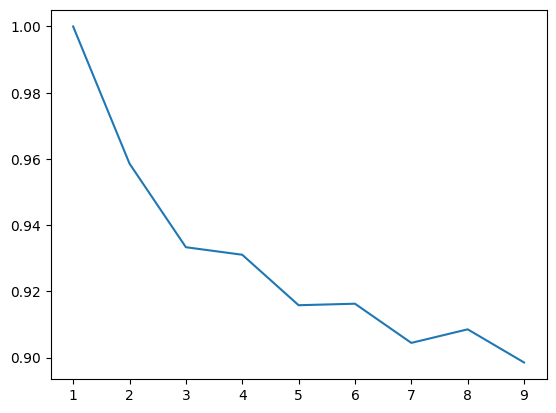

In [46]:
plt.plot(np.arange(1,10), scores)
plt.show()

k = 3, gives the highest accuracy

In [47]:
k = 3

In [48]:
knn = KNeighborsClassifier(n_neighbors=k)  # KNN Model
knn.fit(X_train, y_train) # Training KNN model

KNeighborsClassifier(n_neighbors=3)

In [49]:
print("Test set score: "+ str(knn.score(X_test, y_test)))

Test set score: 0.8466494845360825


## SVM

the term "kernel" refers to a function that transforms the input data into a higher-dimensional space.

In [50]:
poly = SVC(kernel="poly", degree=2, random_state=8)
linear = SVC(kernel="linear")
sigmoid = SVC(kernel="sigmoid", random_state=8)


In [51]:
pre_poly = poly.fit(X_train,y_train)
pre_linear = linear.fit(X_train,y_train)
pre_sigmoid = sigmoid.fit(X_train,y_train)
 

In [54]:

y_poly = pre_poly.predict(X_test)
y_linear = pre_linear.predict(X_test)
y_sigmoid = pre_sigmoid.predict(X_test)

print("poly score: " + str(metrics.accuracy_score(y_test, y_poly)))

poly score: 0.7603092783505154
